Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [76]:
NAME = Mohini Khedekar
COLLABORATORS = ""

SyntaxError: ignored

---

# Basic Folding Algorithm
Keywords: pose_from_sequence(), random move, scoring move, Metropolis, assign(), Pose()

In [77]:
!pip install pyrosettacolabsetup
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
import pyrosetta; pyrosetta.init()
from pyrosetta import *
from pyrosetta.teaching import *
init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2023.19+release.d7aa7f94e8be5e9d5110d37f167c2a7afd30c530 2023-05-08T16:22:16] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r348 2023.19+release.d7aa7f94e8b d7aa7f94e8be5e9d5110d37f167c2a7afd30c530 http://www.pyrosetta.org 2023-05-08T16:22:16
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-687167577 seed_offset=0 real_seed=-687167577
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-687167577 RG_type=mt19937
PyRosetta-4 202

## Building the Pose

In this lab, you will be folding a 10 residue protein by building a simple de novo folding algorithm. Start by initializing PyRosetta as usual.

Create a simple poly-alanine `pose` with 10 residues for testing your folding algorithm. Store the pose in a variable called "polyA."

In [78]:
# YOUR CODE HERE
polyA = pose_from_sequence('AAAAAAAAAA')

polyA.pdb_info().name("polyA")

__Question:__
Check the backbone dihedrals of a few residues (except the first and last) using the `.phi()` and `.psi()` methods in `Pose`. What are the values of $\phi$ and $\psi$ dihedrals? You should see ideal bond lengths and angles, but the dihedrals may not be as realistic.

In [79]:




for i in range (2, 10):
  print (polyA.phi(i))
  print (polyA.psi(i))

polyA.dump_pdb("/content/google_drive/MyDrive/codeschool2023/dihedralanglesA10.pdb")

180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
core.io.pdb.pdb_writer: [ ERROR ] StructFileRep::dump_pdb: Unable to open file:/content/google_drive/MyDrive/codeschool2023/dihedralanglesA10.pdb for writing!!!


False

Use PyMOL to view the `polyA` `Pose`. You should see a long thread-like structure in PyMOL.

In [80]:
# visualize the pose in PyMOL and save the screenshot to submit
#screenshot saved in github

## Building A Basic *de Novo* Folding Algorithm

Now, write a program that implements a Monte Carlo algorithm to optimize the protein conformation. The algorithm will be very simple: make a random move, score the protein, and accept/reject the move based on the Metropolis criterion.

Our main program will include 100 iterations of making a random trial move, scoring the protein, and accepting/rejecting the move. Therefore, we can break this algorithm down into three smaller subroutines: **random, score, and decision.**

### Step 1: Random Move

For the **random** trial move, write a subroutine to choose one residue at random using `random.randint()` and then randomly perturb either the φ or ψ angles by a random number chosen from a Gaussian distribution. Use the Python built-in function `random.gauss()` from the `random` library with a mean of the current angle and a standard deviation of 25°.

In [81]:
import math
import random


def randTrial(pose):
  randit = random.randint(1,len(pose.sequence()))
  current_phi = pose.phi(randit)
  new_phi = random.gauss(current_phi, 25)

  pose.set_phi(randit, new_phi)
  return pose




### Step 2: Scoring Move

For the **scoring** step, we need to create a scoring function and make a subroutine that simply returns the numerical energy score of the pose.

In [82]:
sfxn = get_fa_scorefxn()

pose = polyA

def score(pose):
   return sfxn(pose)

score(pose)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


29.96724428561499

### Step 3: Accepting/Rejecting Move
For the **decision** step, we need to make a subroutine that either accepts or rejects the new conformatuon based on the Metropolis criterion. The Metropolis criterion has a probability of accepting a move as $P = \exp( -\Delta G / kT )$. When $ΔE ≥ 0$, the Metropolis criterion probability of accepting the move is $P = \exp( -\Delta G / kT )$. When $ΔE < 0$, the Metropolis criterion probability of accepting the move is $P = 1$. Use $kT = 1$ Rosetta Energy Unit (REU).

In [88]:
def decision(before_pose, after_pose):
  
  DE = score(after_pose)-score(before_pose)
  if DE <= 0:
    return after_pose

  else:
    P = math.exp(-DE)
    x = random.random()
    if x > P:
      return before_pose

    else:
      return after_pose



### Step 4: Execution
Now we can put these three subroutines together in our main program! Write a loop in the main program so that it performs 100 iterations of: making a random trial move, scoring the protein, and accepting/rejecting the move. 

After each iteration of the search, output the current pose energy and the lowest energy ever observed. **The final output of this program should be the lowest energy conformation that is achieved at *any* point during the simulation.** Be sure to use `low_pose.assign(pose)` rather than `low_pose = pose`, since the latter will only copy a pointer to the original pose.

In [84]:
def basic_folding(your_pose):
    """Your basic folding algorithm that completes 100 Monte-Carlo iterations on a given pose"""
    low_pose = Pose()

    
    
    for i in range(100):
      if i == 0:
        low_pose.assign(your_pose)
      
    #in the code above, we are saying that our first iteration is going to be our lowest pose 
      
      before_pose = Pose()
      before_pose.assign(your_pose)

      after_pose = Pose()
      after_pose.assign(randTrial(your_pose))
      #in the code above, we are randomly making mutations and finding the score

      your_pose.assign(decision(before_pose, after_pose))
      #we are constantly updating your_pose


      if score(your_pose)>score(low_pose):
        low_pose.assign(your_pose)


    return low_pose

lowest_pose = Pose()
lowest_pose = basic_folding(pose)

lowest_pose.dump_pdb("/content/google_drive/MyDrive/codeschool2023/lowestenergy2.pdb")

<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyrosetta.rosetta.core.pose.Pose'>
<class 'pyr

False

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Finally, output the last pose and the lowest-scoring pose observed and view them in PyMOL (you'll need to dump the pose into a new pdb for this). Submit a screenshot of this.

Plot the energy and lowest-energy observed vs. cycle number. What are the energies of the initial, last, and lowest-scoring pose? Is your program working? Has it converged to a good solution?


[17.662777030374823, 17.662777030374823, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118,

Text(0, 0.5, 'lowest energy')

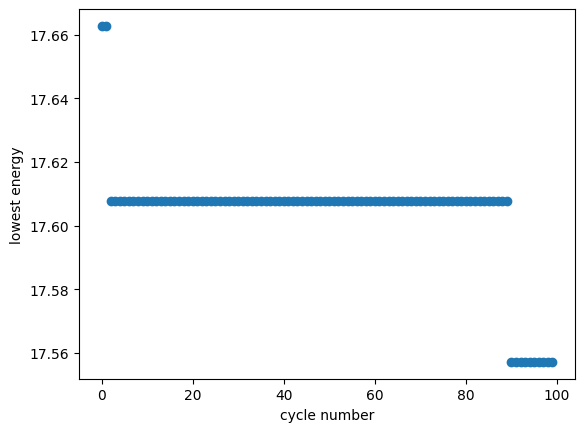

In [93]:
#making a plot for the energy

current_energy_list = []
lowest_energy_list = []
cycle_list = []

def basic_folding(your_pose):
    """Your basic folding algorithm that completes 100 Monte-Carlo iterations on a given pose"""
    low_pose = Pose()

    for i in range(100):
      if i == 0:
        low_pose.assign(your_pose)
      
    #in the code above, we are saying that our first iteration is going to be our lowest pose 
      
      before_pose = Pose()
      before_pose.assign(your_pose)

      after_pose = Pose()
      after_pose.assign(randTrial(your_pose))
      #in the code above, we are randomly making mutations and finding the score
      

      your_pose.assign(decision(before_pose,after_pose))
      #we are constantly updating your_pose


      if score(your_pose)<score(low_pose):
        low_pose.assign(your_pose)
      lowest_energy_list.append(score(low_pose))
      current_energy_list.append(score(your_pose))
      #it should be inside the for loop 

    print(lowest_energy_list)
    return [low_pose, lowest_energy_list, current_energy_list]

lowest_pose = Pose()
array = basic_folding(pose)
lowest_pose= array[0]

import matplotlib
import matplotlib.pyplot as plt

x_coords = range(0,100)
y_coords = array[1]
print(x_coords)
print(y_coords)
plt.scatter(x_coords, y_coords)
plt.xlabel("cycle number")
plt.ylabel("lowest energy")

In [94]:
basic_folding(polyA)


[17.662777030374823, 17.662777030374823, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118, 17.607889667786118,

 [17.662777030374823,
  17.662777030374823,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.607889667786118,
  17.60788

### Exercise 1: Comparing to Alpha Helices
Using the program you wrote previously, force the $A_{10}$ sequence into an ideal α-helix.

**Questions:** Does this helical structure have a lower score than that produced by your folding algorithm above? What does this mean about your sampling or discrimination?

https://www.cryst.bbk.ac.uk/PPS95/course/9_quaternary/3_geometry/torsion.html#:~:text=Typical%20values%20are%20phi%20%3D%20%2D140,degrees%20and%20psi%20%3D%20130%20degrees.

In [ ]:
# Answer the above questions here:
for i in polyA.sequence:


### Exercise 2: Optimizing Algorithm 
Since your program is a stochastic search algorithm, it may not produce an ideal structure consistently, so try running the simulation multiple times or with a different number of cycles (if necessary). Using a kT of 1, your program may need to make up to 500,000 iterations.

In [ ]:
# Report the lowest energy pose you found and the energy of that pose.
# Dump this pose to a PDB file and visualize it in PyMOL. Submit a screenshot of the pose in PyMOL.